# Understanding problem statement and investigation area

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/drive/MyDrive/Data Science Group Assignment Data Alchemist/city_day.csv")
df_master=df.copy()

# Data Inspection


In [ ]:
df_master.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df_master.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
df_master.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df_master.nunique()

,0
City,26
Date,2009
PM2.5,11716
PM10,12571
NO,5776
NO2,7404
NOx,8156
NH3,5922
CO,1779
SO2,4761


In this project, we are going to study the relationship between the air components and the AQI value. Thus, predict the AQI_Bucket value by using the AQI value.  

# Data Cleaning

###Treat missing values


In [ ]:
df_treat_miss=df_master

In [ ]:
# check null values
nullvalues = df_treat_miss.isnull().sum().sort_values(ascending=False)
null_values_percentage = (df_treat_miss.isnull().sum()/df_treat_miss.isnull().count()*100).sort_values(ascending=False)
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
missing_data_with_percentage

,Total,Percent
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


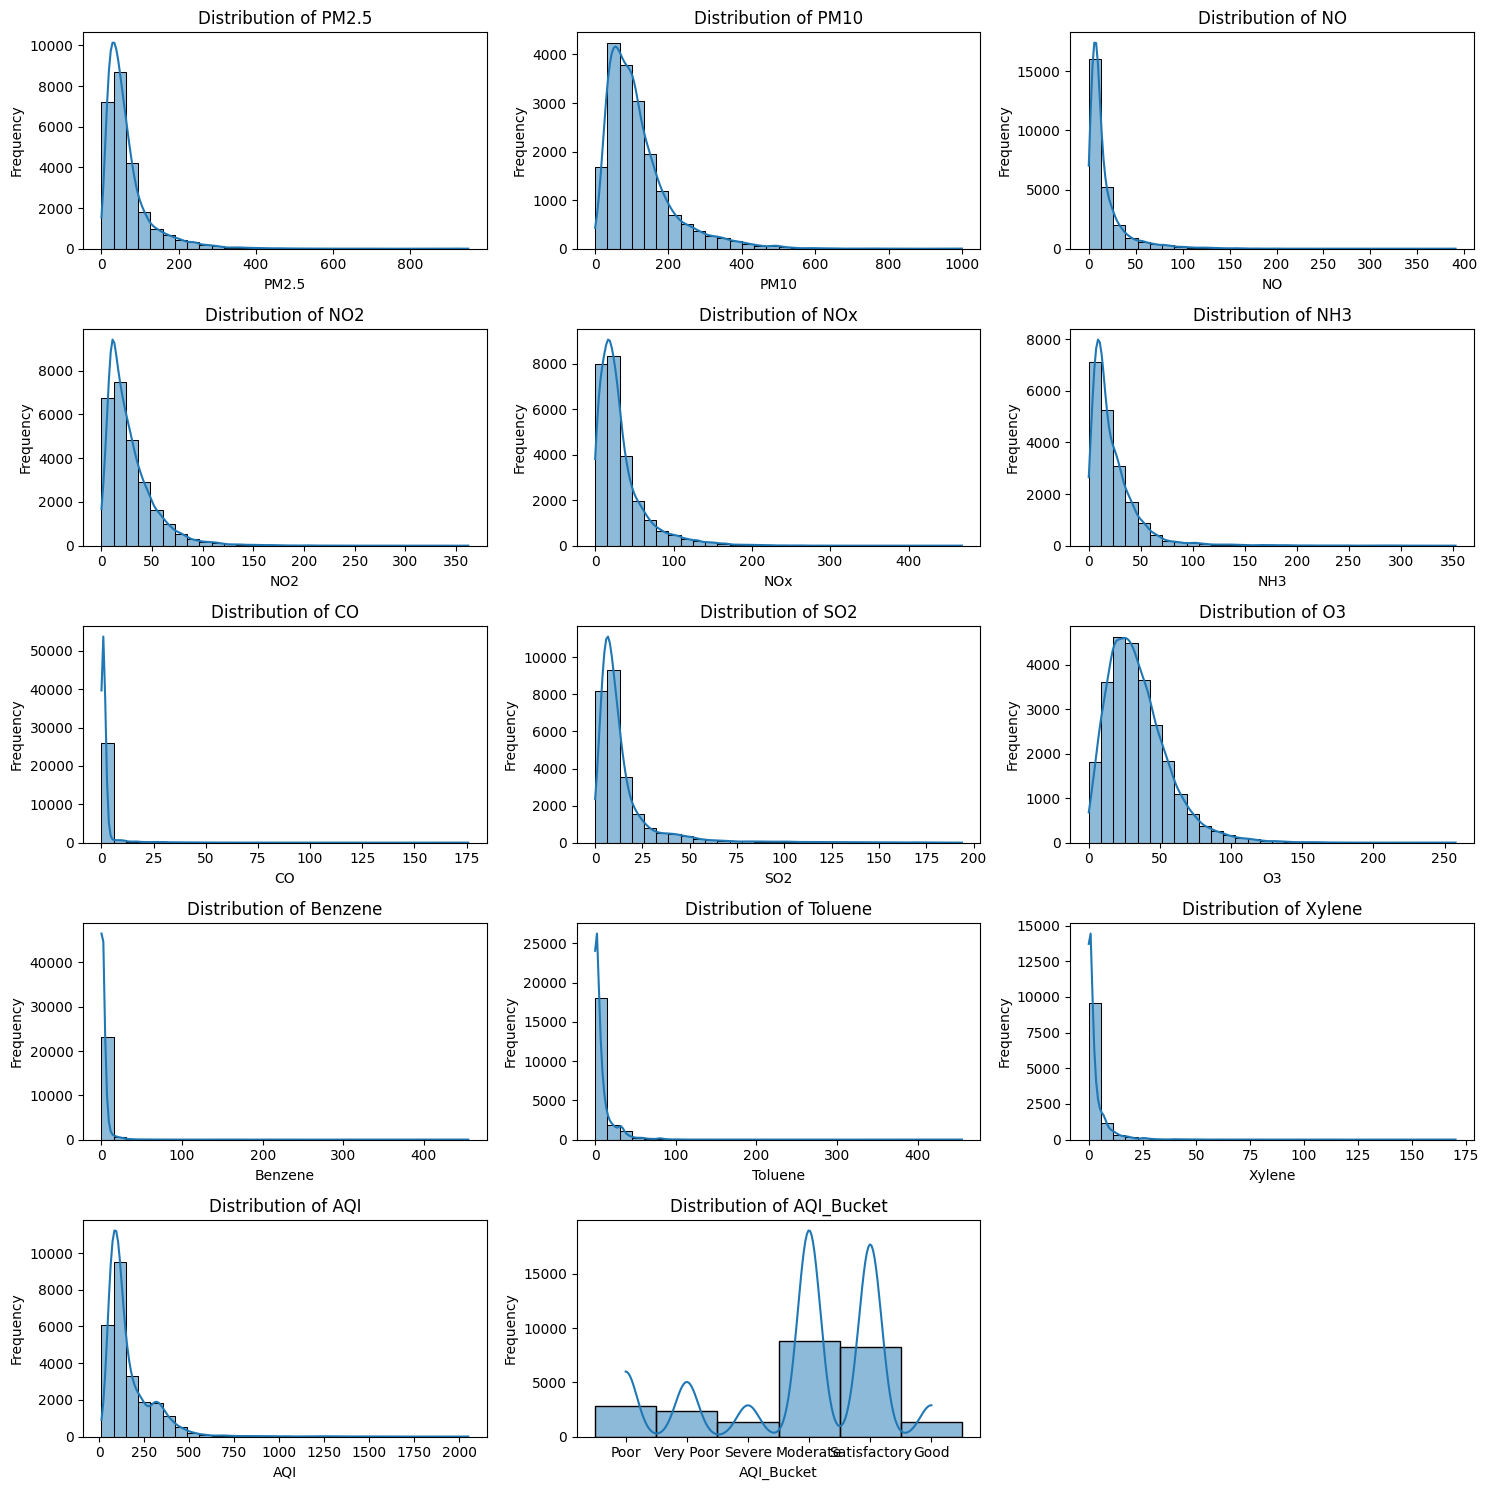

In [ ]:
# plot historgam to view the skewness of the graph
columns_to_plot = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
                   'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

n_cols = 3
n_rows = (len(columns_to_plot) // n_cols) + (1 if len(columns_to_plot) % n_cols != 0 else 0)
plt.figure(figsize=(15, 3 * n_rows))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_treat_miss[column].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# impute using median of each city for graphs that are not symmetric
columns_to_impute = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
                   'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for column in columns_to_impute:
    df_treat_miss[column] = df_treat_miss.groupby('City')[column].transform(lambda x: x.fillna(x.median()))

# AQI bucket with AQI value
def categorize_aqi(aqi_value):
    if aqi_value <= 100:
        return 'Satisfactory'
    elif aqi_value <= 200:
        return 'Moderate'
    elif aqi_value <= 300:
        return 'Poor'
    elif aqi_value <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

df_treat_miss['AQI_Bucket'] = df_treat_miss['AQI'].apply(categorize_aqi)

df_treat_miss['AQI_Bucket'] = df_treat_miss.groupby('City')['AQI_Bucket'].transform(
    lambda x: x.fillna(x.mode()[0])
)

In [ ]:
# check null values
nullvalues = df_treat_miss.isnull().sum().sort_values(ascending=False)
null_values_percentage = (df_treat_miss.isnull().sum() / df_treat_miss.isnull().count() * 100).sort_values(ascending=False)
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
missing_data_with_percentage = missing_data_with_percentage[missing_data_with_percentage['Total'] > 0]

missing_data_with_percentage

,Total,Percent
Xylene,13047,44.180691
Toluene,4010,13.578951
Benzene,2732,9.251295
PM10,2009,6.803021
NH3,2009,6.803021
NOx,1169,3.958552
O3,162,0.548576


In [ ]:
# drop rows with null values for column Xylene
df_treat_miss = df_treat_miss.dropna(subset=['Xylene'])

In [ ]:
# check null values
nullvalues = df_treat_miss.isnull().sum().sort_values(ascending=False)
null_values_percentage = (df_treat_miss.isnull().sum() / df_treat_miss.isnull().count() * 100).sort_values(ascending=False)
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
missing_data_with_percentage = missing_data_with_percentage[missing_data_with_percentage['Total'] > 0]

missing_data_with_percentage

,Total,Percent
NH3,2009,12.187576
O3,162,0.982771


In [ ]:
df_treat_miss.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,16484.000000,16484.000000,16484.000000,16484.000000,16484.000000,14475.000000,16484.000000,16484.000000,16322.000000,16484.000000,16484.000000,16484.000000,16484.000000
mean,70.628025,125.066414,21.175254,33.770248,38.404972,19.737131,3.371885,17.544387,35.637100,2.949096,9.745821,2.632811,191.998271
std,67.575190,78.043022,23.329964,26.566926,33.355161,13.894745,9.103259,19.828581,20.784672,4.857283,15.074925,5.365053,160.298181
min,2.000000,7.120000,0.060000,0.040000,0.000000,0.010000,0.000000,0.210000,0.020000,0.000000,0.000000,0.000000,20.000000
25%,28.280000,77.880000,7.220000,16.450000,17.820000,12.090000,0.470000,6.930000,22.580000,0.250000,0.750000,0.140000,91.000000
50%,51.925000,107.960000,14.835000,26.170000,28.685000,14.500000,0.850000,11.720000,30.575000,1.675000,3.650000,1.130000,129.000000
75%,86.982500,146.652500,25.340000,45.405000,45.792500,24.530000,1.540000,18.190000,43.280000,3.870000,12.150000,2.680000,257.000000
max,949.990000,917.080000,287.140000,362.210000,467.630000,166.700000,175.810000,193.860000,257.730000,142.000000,371.650000,170.370000,2049.000000


In [ ]:
# impute using median for NH3 and O3 where there are no non-null values for its corresponding city
df_treat_miss.loc[:, 'NH3'] = df_treat_miss['NH3'].fillna(df_treat_miss['NH3'].median())
df_treat_miss.loc[:, 'O3'] = df_treat_miss['O3'].fillna(df_treat_miss['O3'].median())

In [ ]:
df_master=df_treat_miss

###Treat outliers

In [ ]:
df_treat_out=df_master

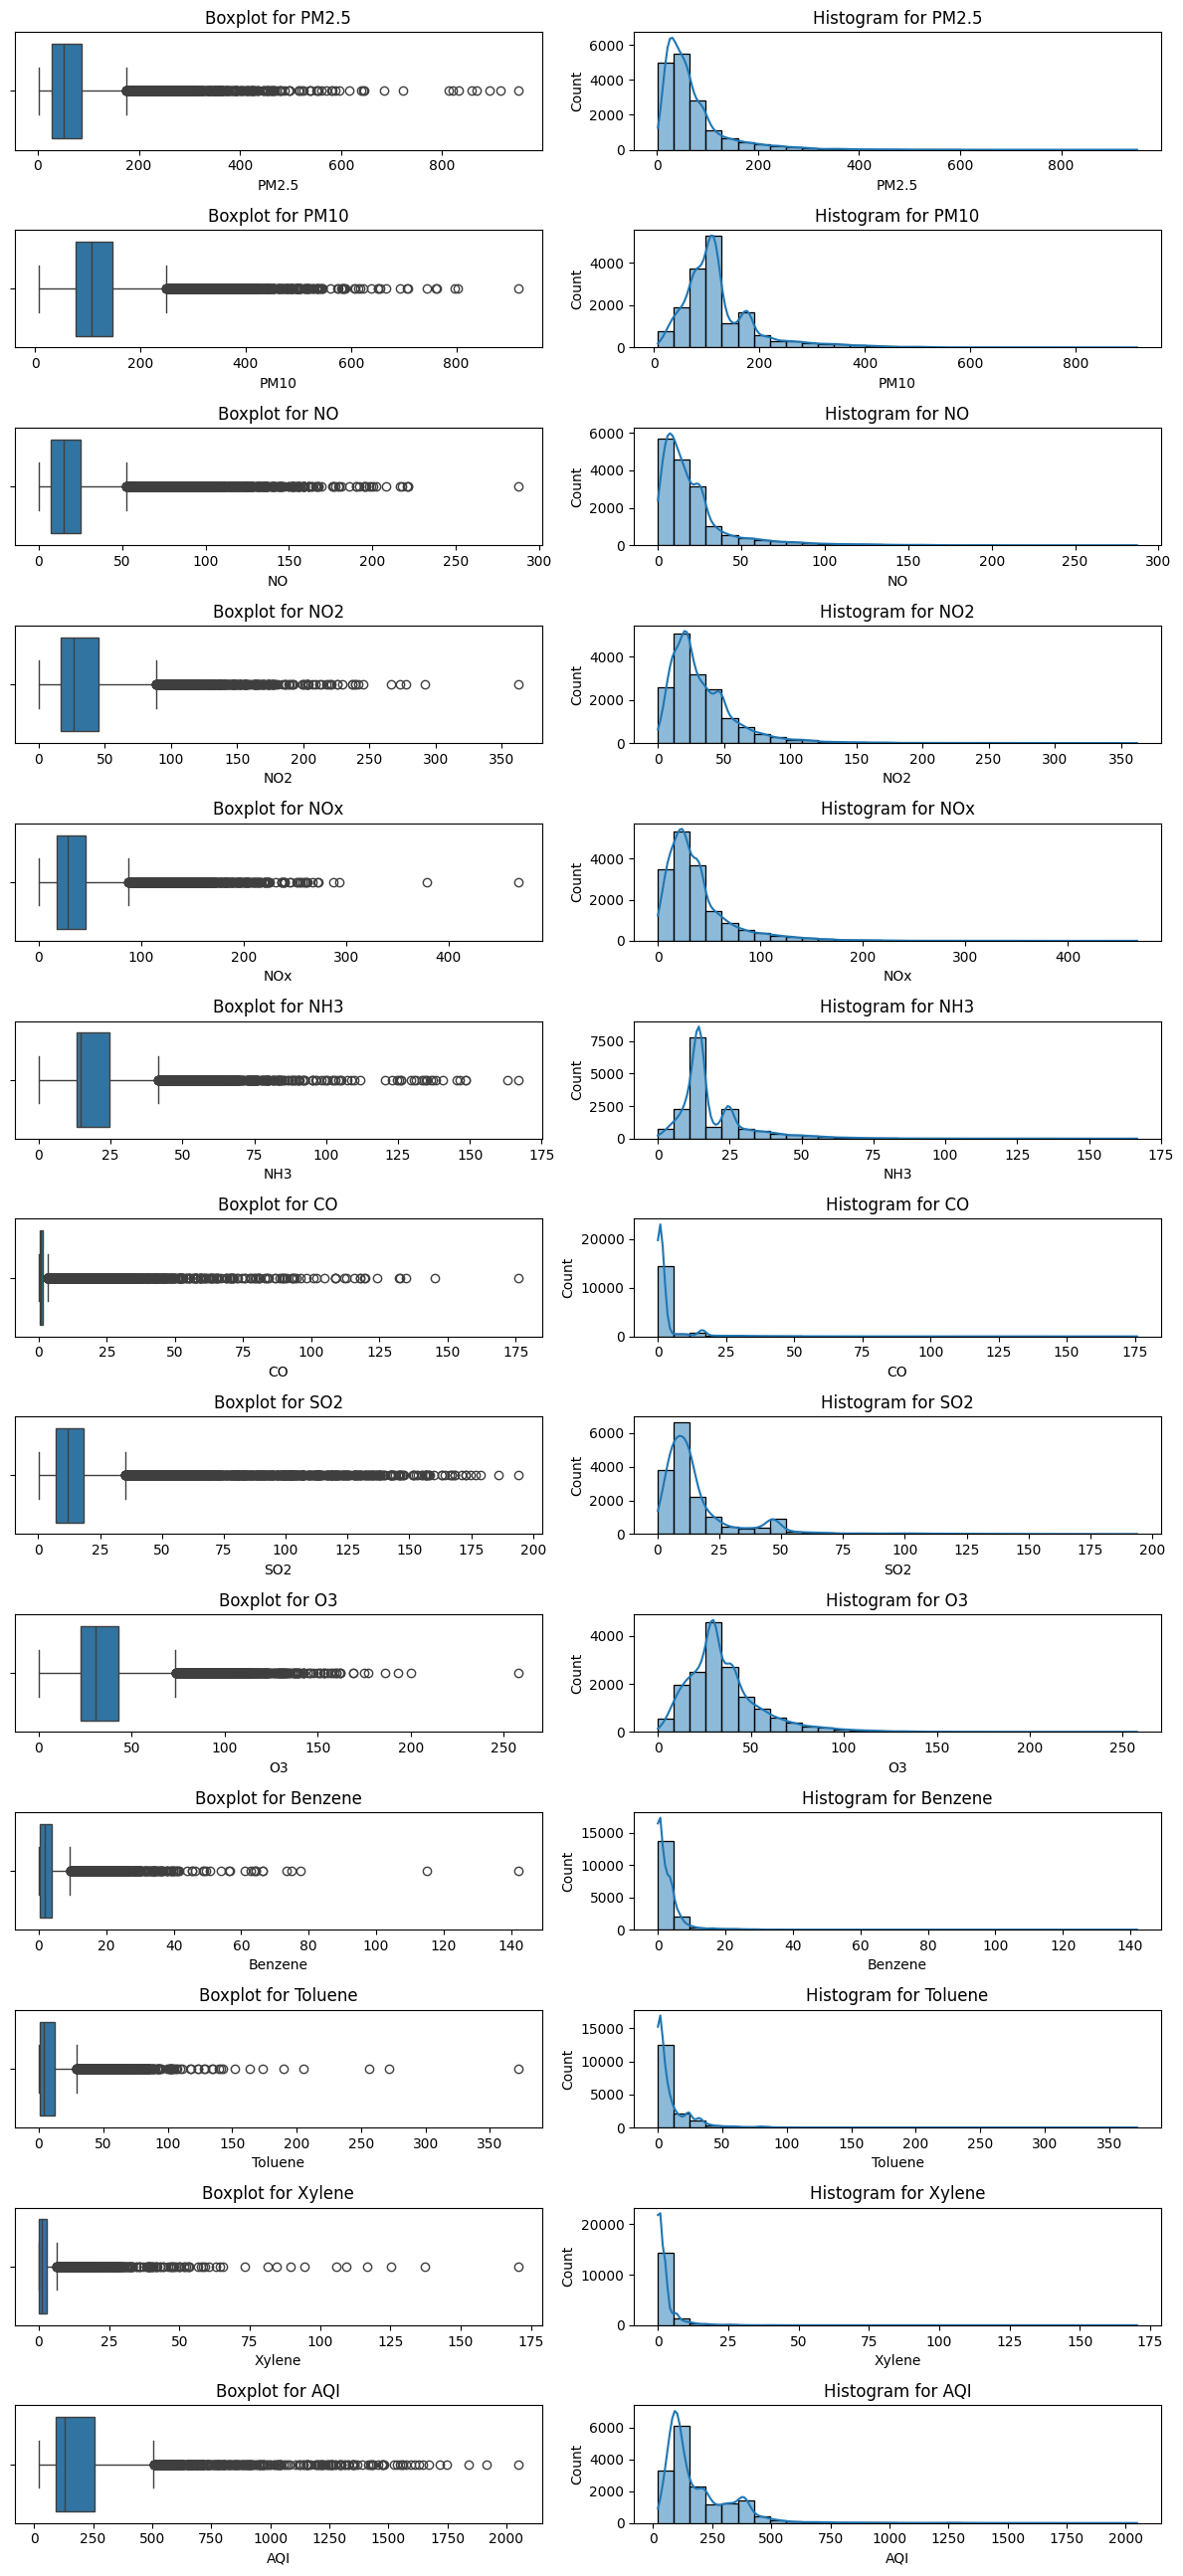

In [ ]:
# Check outliers presence
plots_per_row = 2

num_columns = df_treat_out.select_dtypes(include=['float64']).columns
num_plots = len(num_columns) * 2
num_rows = (num_plots + plots_per_row - 1) // plots_per_row
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(12, 2 * num_rows))
axes = axes.flatten()

for i, column in enumerate(num_columns):
    sns.boxplot(x=df_treat_out[column], ax=axes[i * 2])
    axes[i * 2].set_title(f'Boxplot for {column}')
    axes[i * 2].set_xlabel(column)

    sns.histplot(df_treat_out[column], bins=30, kde=True, ax=axes[i * 2 + 1])
    axes[i * 2 + 1].set_title(f'Histogram for {column}')
    axes[i * 2 + 1].set_xlabel(column)

for j in range(len(num_columns) * 2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(df, column_name, lower_boundary, upper_boundary):
    df_no_outliers = df[(df[column_name] >= lower_boundary) &
                        (df[column_name] <= upper_boundary)]
    return df_no_outliers

# Set outliers boundaries
outlier_columns = [
    #{'column': 'PM2.5', 'lower_boundary': 0, 'upper_boundary': 800},
    #{'column': 'PM10', 'lower_boundary': 0, 'upper_boundary': 800},
    {'column': 'NO', 'lower_boundary': 0, 'upper_boundary': 200},
    {'column': 'NO2', 'lower_boundary': 0, 'upper_boundary': 300},
    {'column': 'NOx', 'lower_boundary': 0, 'upper_boundary': 300},
    #{'column': 'NH3', 'lower_boundary': 0, 'upper_boundary': 200},
    #{'column': 'CO', 'lower_boundary': 0, 'upper_boundary': 150},
    #{'column': 'SO2', 'lower_boundary': 0, 'upper_boundary': 175},
    {'column': 'O3', 'lower_boundary': 0, 'upper_boundary': 160},
    {'column': 'Benzene', 'lower_boundary': 0, 'upper_boundary': 80},
    #{'column': 'Toluene', 'lower_boundary': 0, 'upper_boundary': 250},
    #{'column': 'Xylene', 'lower_boundary': 0, 'upper_boundary': 150},
    #{'column': 'AQI', 'lower_boundary': 0, 'upper_boundary': 1750}
]

for col_info in outlier_columns:
    column = col_info['column']
    lower_boundary = col_info['lower_boundary']
    upper_boundary = col_info['upper_boundary']

    df_treat_out = remove_outliers(df_treat_out, column, lower_boundary, upper_boundary)

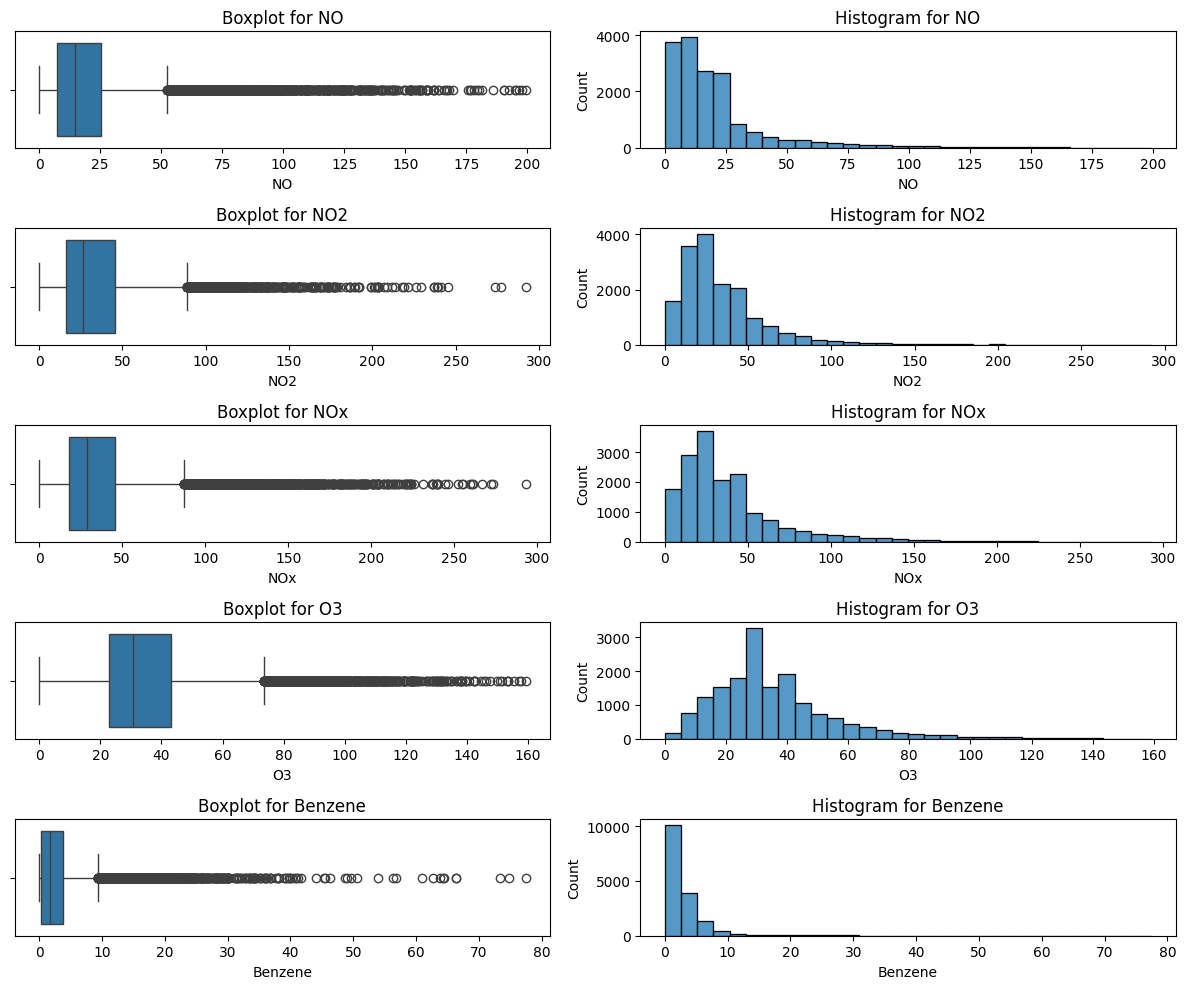

In [ ]:
# Review changes
columns_to_plot = [
    'NO', 'NO2', 'NOx', 'O3', 'Benzene'
]
plots_per_row = 2
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=plots_per_row, figsize=(12, 2 * len(columns_to_plot)))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):

    sns.boxplot(x=df_treat_out[column], ax=axes[i * 2])
    axes[i * 2].set_title(f'Boxplot for {column}')
    axes[i * 2].set_xlabel(column)

    sns.histplot(df_treat_out[column], bins=30, ax=axes[i * 2 + 1])
    axes[i * 2 + 1].set_title(f'Histogram for {column}')
    axes[i * 2 + 1].set_xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:
df_master=df_treat_out

In [ ]:
df_table=df_master

###Data type table

In [ ]:
# format data type table
def round_up_to_nearest(value, round_to):
    """Round up to the nearest multiple of `round_to`."""
    return math.ceil(value / round_to) * round_to

def create_data_type_table(df_table):
    summary = []

    outlier_columns = [
        {'column': 'NO', 'lower_boundary': 0, 'upper_boundary': 200},
        {'column': 'NO2', 'lower_boundary': 0, 'upper_boundary': 300},
        {'column': 'NOx', 'lower_boundary': 0, 'upper_boundary': 300},
        {'column': 'O3', 'lower_boundary': 0, 'upper_boundary': 200},
        {'column': 'Benzene', 'lower_boundary': 0, 'upper_boundary': 100},
    ]

    for column in df_table.columns:
        data_type = df_table[column].dtype
        is_numeric = pd.api.types.is_numeric_dtype(df_table[column])

        outliers = "No"

        if column == "Date":
            min_value = df_table[column].min() if df_table[column].notnull().any() else "-"
            max_value = df_table[column].max() if df_table[column].notnull().any() else "-"
            range_value = f"{min_value} to {max_value}" if min_value != "-" else "-"
            unique_values = df_table[column].nunique()
            top_value = max_value

        elif column == "City" or column == "AQI_Bucket":
            top_value = df_table[column].mode()[0]
            min_value = df_table[column].value_counts().idxmin()
            range_value = ", ".join(df_table[column].dropna().unique().astype(str))
            unique_values = df_table[column].nunique()

        else:
            measurement_level = "Ratio" if is_numeric else "Nominal"
            min_value = 0
            max_value = df_table[column].max() if is_numeric else "-"
            rounded_upper_value = round_up_to_nearest(max_value, 100)
            range_value = f"{min_value} - {rounded_upper_value}" if is_numeric else ", ".join(df_table[column].dropna().unique().astype(str))
            unique_values = df_table[column].nunique()
            top_value = rounded_upper_value

            for outlier_col in outlier_columns:
                if outlier_col['column'] == column:
                    outliers = f"Yes, {outlier_col['lower_boundary']} < or > {outlier_col['upper_boundary']}"
                    break

            if outliers == "No":
                outlier_condition = (df_table[column] < min_value) | (df_table[column] > rounded_upper_value)

                if outlier_condition.any():
                    outliers = f"Yes, {min_value} < or > {rounded_upper_value} (rounded)"

        null_values = df_table[column].isnull().sum()

        summary.append({
            "Variable": column,
            "Types of Data": "Numeric" if is_numeric else "Categorical",
            "Data Types": data_type,
            "Measurement Level": "Ratio" if is_numeric else "Nominal",
            "Range": range_value,
            "Min Value": min_value,
            "Top Value": top_value,
            "Unique Values": unique_values,
            "Null Values": null_values,
            "Outliers": outliers
        })

    return pd.DataFrame(summary)

data_type_table = create_data_type_table(df_table)
data_type_table

,Variable,Types of Data,Data Types,Measurement Level,Range,Min Value,Top Value,Unique Values,Null Values,Outliers
0,City,Categorical,object,Nominal,"Ahmedabad, Amaravati, Amritsar, Chandigarh, De...",Ernakulam,Ahmedabad,12,0,No
1,Date,Categorical,object,Nominal,2015-01-01 to 2020-07-01,2015-01-01,2020-07-01,2009,0,No
2,PM2.5,Numeric,float64,Ratio,0 - 1000,0,1000,8775,0,No
3,PM10,Numeric,float64,Ratio,0 - 1000,0,1000,8272,0,No
4,NO,Numeric,float64,Ratio,0 - 200,0,200,5017,0,"Yes, 0 < or > 200"
5,NO2,Numeric,float64,Ratio,0 - 300,0,300,6426,0,"Yes, 0 < or > 300"
6,NOx,Numeric,float64,Ratio,0 - 300,0,300,6980,0,"Yes, 0 < or > 300"
7,NH3,Numeric,float64,Ratio,0 - 200,0,200,4020,0,No
8,CO,Numeric,float64,Ratio,0 - 200,0,200,1548,0,No
9,SO2,Numeric,float64,Ratio,0 - 200,0,200,4103,0,No


###Statistic table

In [ ]:
def create_statistic_table(df):
    summary = []
    for column in df.columns:
        if column == "Date":
            continue

        data_type = df[column].dtype
        is_numeric = pd.api.types.is_numeric_dtype(df[column])

        if is_numeric:
            percentiles = np.percentile(df[column].dropna(), [25, 50, 75])
            percentile_values = f"{percentiles[0]:.2f}, {percentiles[1]:.2f}, {percentiles[2]:.2f}"
        else:
            percentile_values = "-"

        data_completeness = (df[column].count() / len(df)) * 100

        if not is_numeric:
            frequency = df[column].value_counts(normalize=True) * 100
            frequency = ", ".join([f"{index}: {value:.2f}%" for index, value in frequency.items()])
            mean_value = "-"
            median_value = "-"
            mode_value = df[column].mode()[0] if not df[column].isnull().all() else "-"
            std_dev = "-"
            variance = "-"
            skewness = "-"
            kurtosis = "-"
        else:
            frequency = "-"
            mean_value = f"{df[column].mean():.2f}"
            median_value = f"{df[column].median():.2f}"
            mode_value = f"{df[column].mode()[0]:.2f}"
            std_dev = f"{df[column].std():.2f}"
            variance = f"{df[column].var():.2f}"
            skewness = f"{df[column].skew():.2f}"
            kurtosis = f"{df[column].kurt():.2f}"

        summary.append({
            "Variable": column,
            "Frequency": frequency,
            "Percentile (25th, 50th, 75th)": percentile_values,
            "Data Completeness": f"{data_completeness:.2f}%",
            "Mean": mean_value,
            "Median": median_value,
            "Mode": mode_value,
            "Standard Deviation": std_dev,
            "Variance": variance,
            "Skewness": skewness,
            "Kurtosis": kurtosis
        })

    return pd.DataFrame(summary)

statistic_table = create_statistic_table(df_master)
statistic_table

,Variable,Frequency,"Percentile (25th, 50th, 75th)",Data Completeness,Mean,Median,Mode,Standard Deviation,Variance,Skewness,Kurtosis
0,City,"Ahmedabad: 12.20%, Hyderabad: 12.19%, Mumbai: ...",-,100.00%,-,-,Ahmedabad,-,-,-,-
1,PM2.5,-,"28.25, 51.86, 86.87",100.00%,70.39,51.86,23.74,67.08,4500.33,3.30,19.42
2,PM10,-,"77.88, 107.96, 146.19",100.00%,124.82,107.96,118.02,77.50,6006.50,2.27,8.16
3,NO,-,"7.21, 14.80, 25.34",100.00%,21.00,14.80,25.34,22.68,514.27,2.85,10.77
4,NO2,-,"16.42, 26.12, 45.35",100.00%,33.65,26.12,21.46,26.21,686.86,2.30,9.00
5,NOx,-,"17.80, 28.65, 45.67",100.00%,38.22,28.65,39.51,32.77,1073.95,2.22,6.81
6,NH3,-,"13.12, 14.50, 24.53",100.00%,19.06,14.50,14.50,13.05,170.19,2.84,14.28
7,CO,-,"0.47, 0.85, 1.54",100.00%,3.37,0.85,0.00,9.11,82.98,6.31,57.87
8,SO2,-,"6.93, 11.71, 18.15",100.00%,17.53,11.71,12.67,19.82,392.67,3.31,14.69
9,O3,-,"22.76, 30.57, 43.06",100.00%,35.47,30.57,29.62,20.27,410.81,1.56,3.88


#Exploratory Data Analysis

## Data Transformation

In [ ]:
# change the AQI_Bucket into  categorical data
df_master['AQI_Bucket'] = pd.Categorical(df_master['AQI_Bucket'], categories=["Sastifactory", "Moderate", "Poor", "Very Poor", "Severe"], ordered=True)
print(df_master['AQI_Bucket'].unique())

['Very Poor', 'Poor', 'Severe', 'Moderate', NaN]
Categories (5, object): ['Sastifactory' < 'Moderate' < 'Poor' < 'Very Poor' < 'Severe']


In [ ]:
"""
Convert the API_Bucket into integer:
1. Severe = 4
2. Very Poor = 3
3. Poor = 2
4. Moderate = 1
5. Satisfactory = -1
"""
df_master['AQI_Bucket'] = df_master['AQI_Bucket'].cat.codes

In [ ]:
df_master.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df_master.sample(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28238,Visakhapatnam,2016-12-17,69.50,104.08,24.59,65.42,49.38,11.01,1.49,31.48,52.04,8.75,11.76,11.55,119.0,1
10827,Delhi,2016-08-21,28.01,65.58,5.42,27.58,29.64,23.44,3.11,9.02,42.88,1.10,4.52,0.65,111.0,1
2817,Amaravati,2019-10-20,8.12,21.82,1.93,7.85,5.75,8.66,0.53,11.39,34.36,0.08,2.00,0.18,52.0,-1
19509,Kolkata,2019-07-31,23.40,48.28,7.12,25.37,32.49,8.49,0.52,3.43,21.95,15.76,11.99,2.71,54.0,-1
1410,Ahmedabad,2018-11-11,143.72,107.96,65.62,102.87,75.79,14.50,65.62,51.92,39.51,18.27,54.64,15.01,1256.0,4
11338,Delhi,2018-01-14,191.47,308.74,36.32,54.37,1.87,55.35,1.72,22.47,64.80,4.30,10.03,1.71,365.0,3
24724,Patna,2017-10-08,71.67,118.02,16.52,49.33,40.39,14.50,0.57,9.34,26.08,0.07,0.66,0.20,215.0,2
4144,Amritsar,2020-02-03,13.46,29.60,59.14,92.98,67.48,21.41,1.44,13.67,16.71,2.97,3.40,1.71,101.0,1
16230,Hyderabad,2019-07-11,16.54,39.46,2.57,12.01,7.99,8.42,0.35,5.19,16.63,0.17,0.79,0.04,40.0,-1
11256,Delhi,2017-10-24,188.24,331.64,72.71,81.33,87.22,53.82,1.51,23.19,86.13,1.15,5.47,0.07,366.0,3


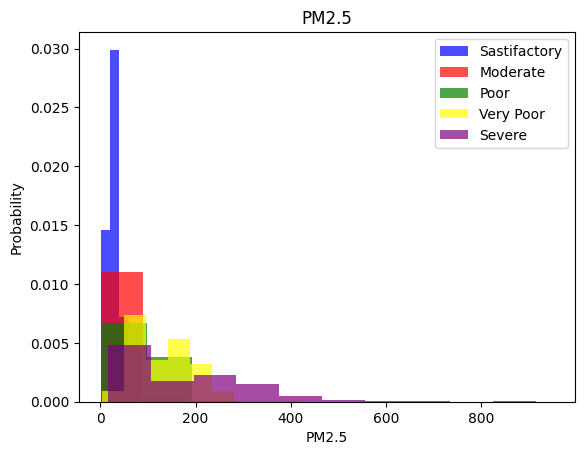

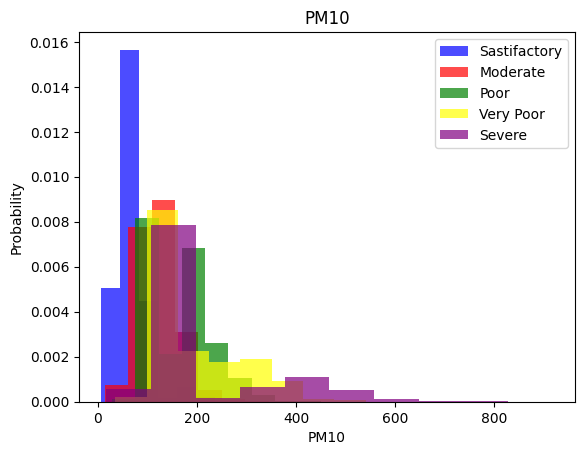

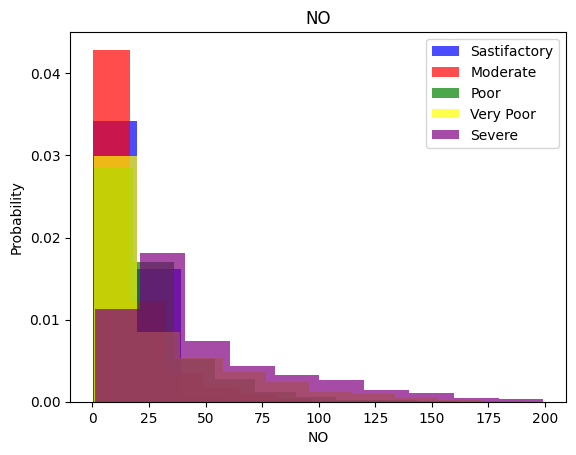

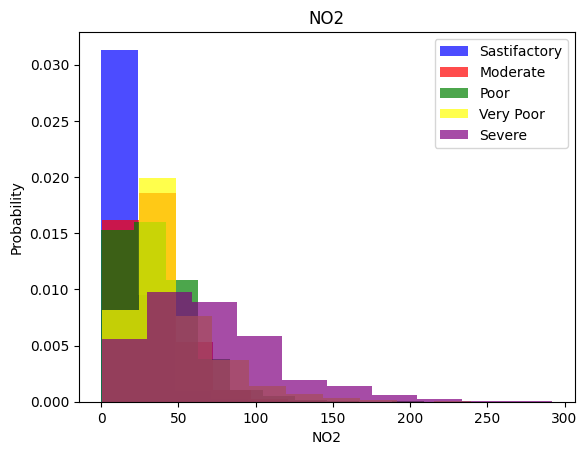

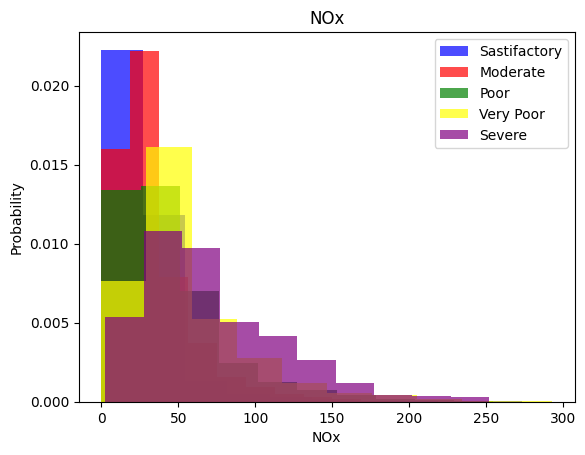

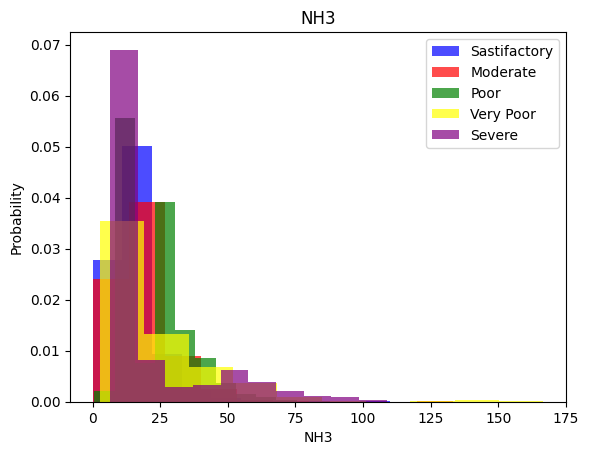

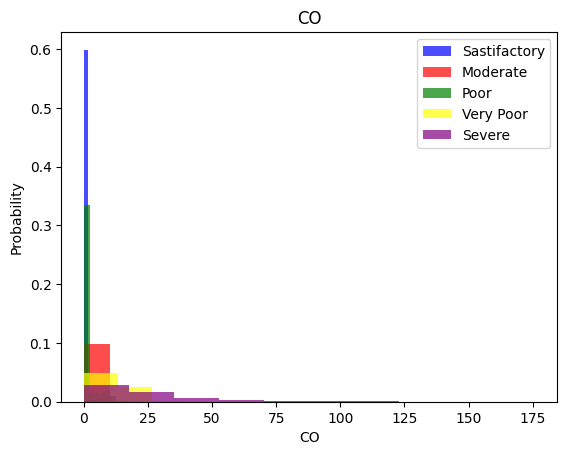

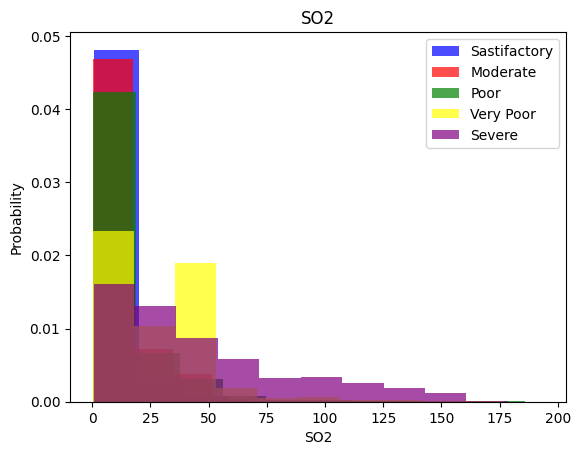

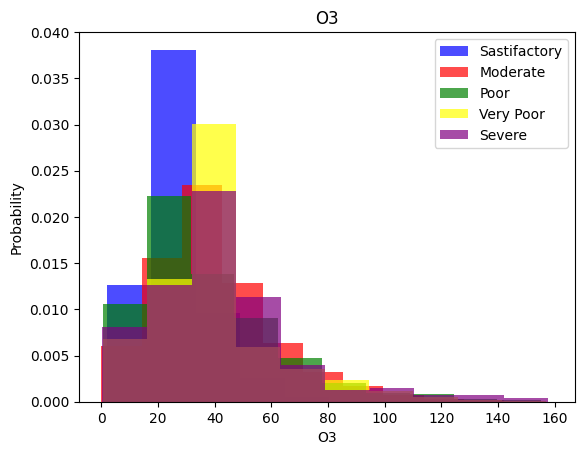

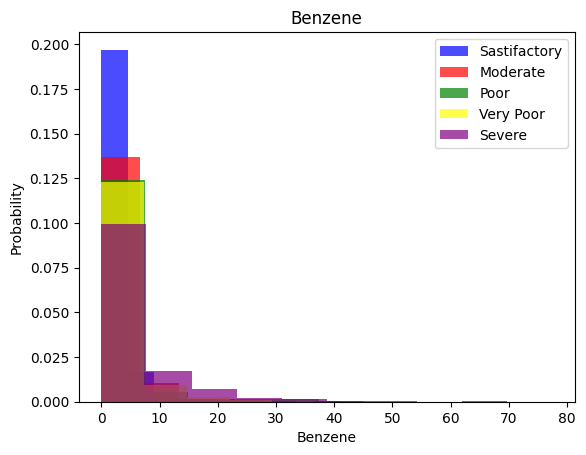

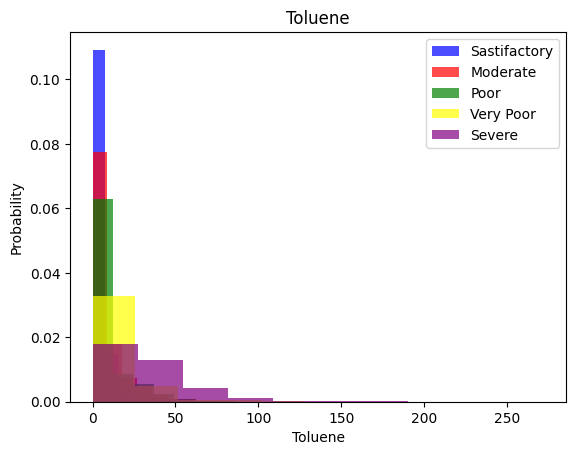

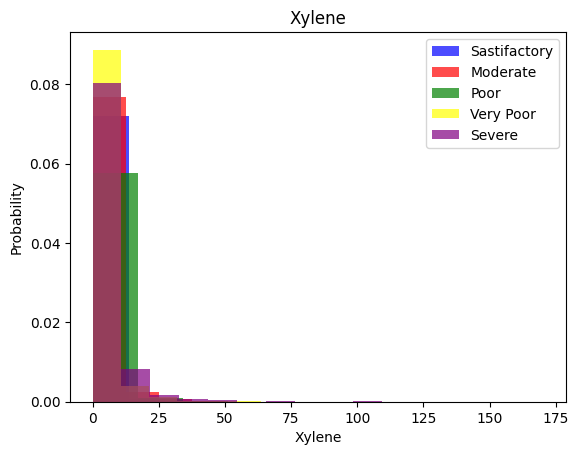

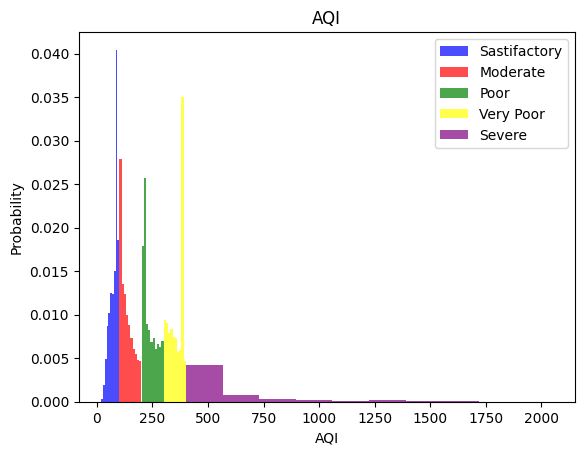

In [ ]:
# study the relationship between features and AQI_Bucket
%matplotlib inline
cols = df_master.columns
for label in cols[2:-1]:
  plt.hist(df_master[df_master['AQI_Bucket']==-1][label], color='blue', label='Sastifactory', alpha=0.7, density=True)
  plt.hist(df_master[df_master['AQI_Bucket']==1][label], color='red', label='Moderate', alpha=0.7, density=True)
  plt.hist(df_master[df_master['AQI_Bucket']==2][label], color='green', label='Poor', alpha=0.7, density=True)
  plt.hist(df_master[df_master['AQI_Bucket']==3][label], color='yellow', label='Very Poor', alpha=0.7, density=True)
  plt.hist(df_master[df_master['AQI_Bucket']==4][label], color='purple', label='Severe', alpha=0.7, density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()

From the histogram, we can observe that the CO level impacts that air quality the most. Low CO level significantly improve the air quality.

In [ ]:
df_master.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df_master.drop(columns=["City", "Date"], inplace=True)

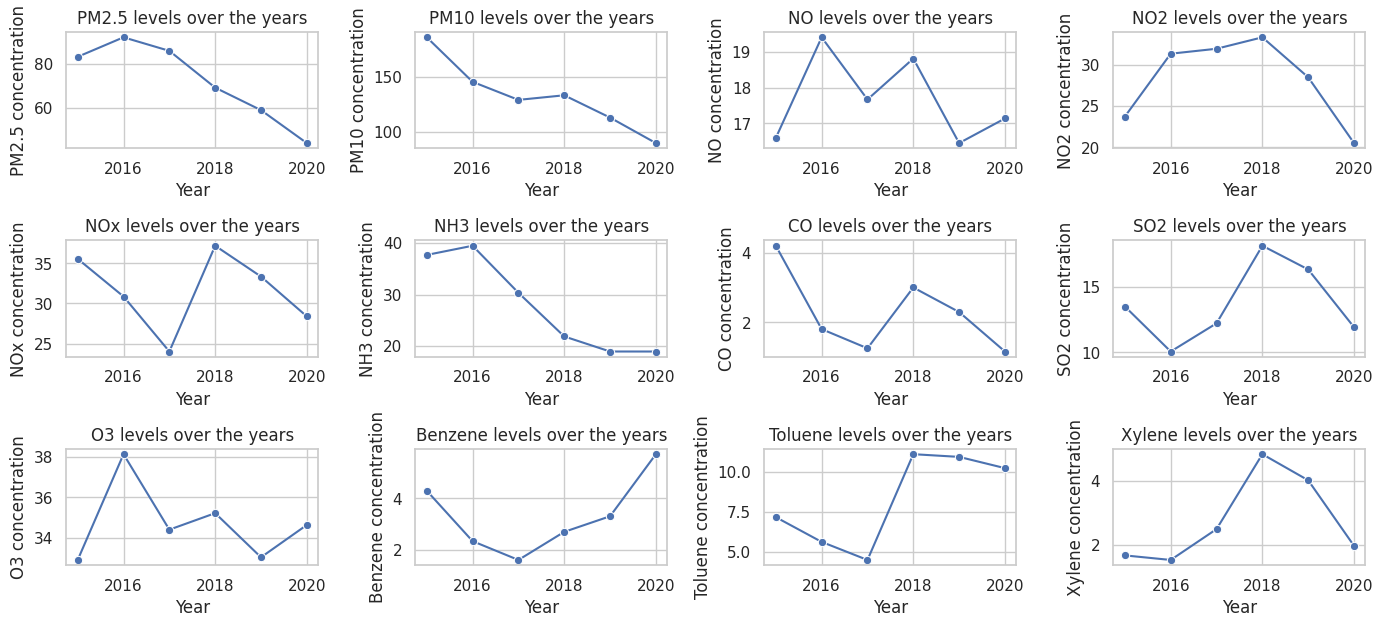

In [ ]:
#How do pollutant levels vary by time(years)?
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Create a DataFrame with the average values of each pollutant by year
pollutants_by_year = df.groupby('Year')[pollutants].mean()

# Visualize the variation in pollutant levels across years

# Set up the plotting style
sns.set(style="whitegrid")

# Plot each pollutant
plt.figure(figsize=(14, 8))
for i, pollutant in enumerate(pollutants):
    plt.subplot(4, 4, i+1)
    sns.lineplot(data=pollutants_by_year, x='Year', y=pollutant, marker='o')
    plt.title(f'{pollutant} levels over the years')
    plt.xlabel('Year')
    plt.ylabel(f'{pollutant} concentration')

plt.tight_layout()
plt.show()



From the diagram illustrated above, we can see that the air components have the trend of decresing every year except for benzene, O3 and NO level. The CO level has come to its lowest level at 2020. This is most likely due to the reducing of vehicles usage during the MCO period.

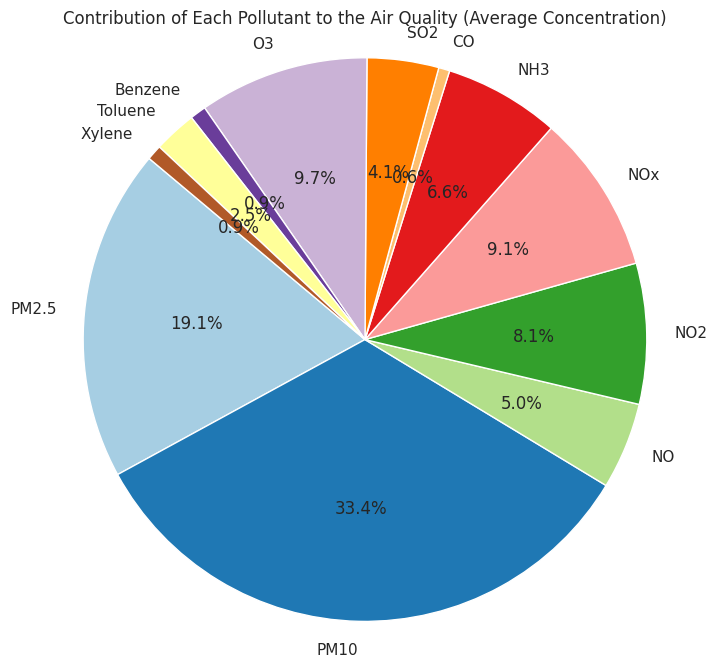

In [ ]:
#what is the pollutant contribute the most to the air quality?
#Calculate the mean concentration of each pollutant
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
mean_pollutants = df[pollutants].mean()

# Step 4: Create a pie chart to visualize the contribution of each pollutant
plt.figure(figsize=(8, 8))
plt.pie(mean_pollutants, labels=mean_pollutants.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Contribution of Each Pollutant to the Air Quality (Average Concentration)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

# Train and evaluate the machine learning models(AQI value)

## Study the relationships between the air components to the AQI value

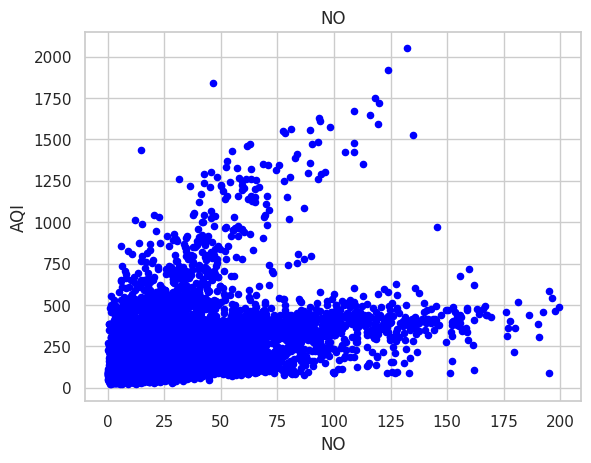

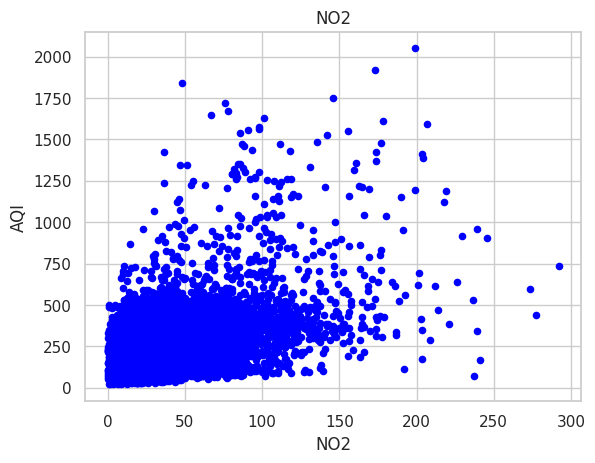

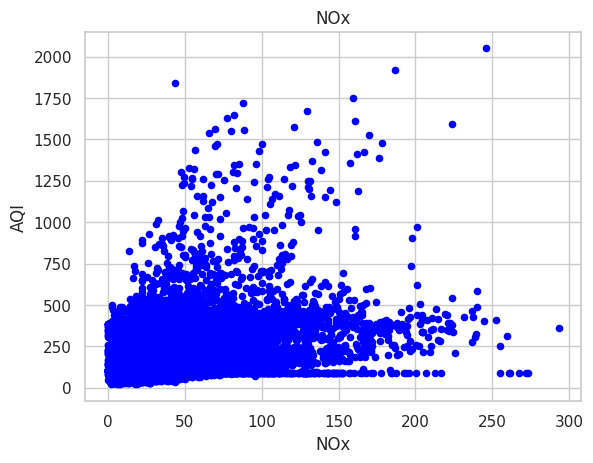

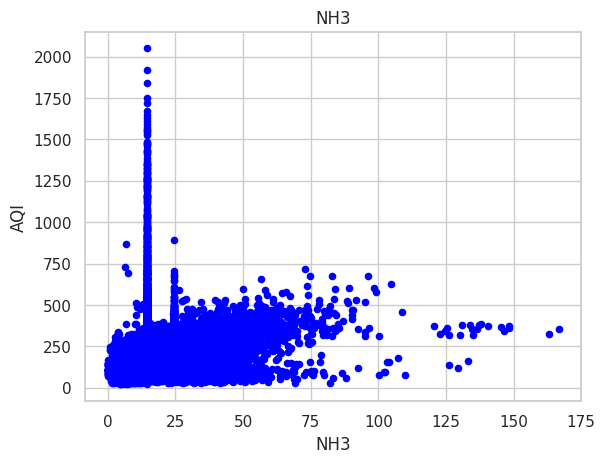

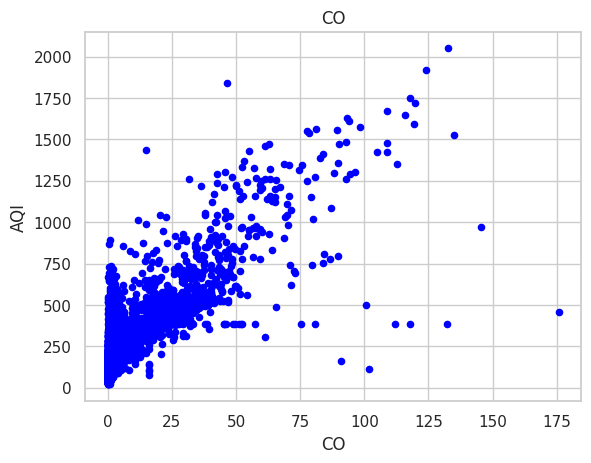

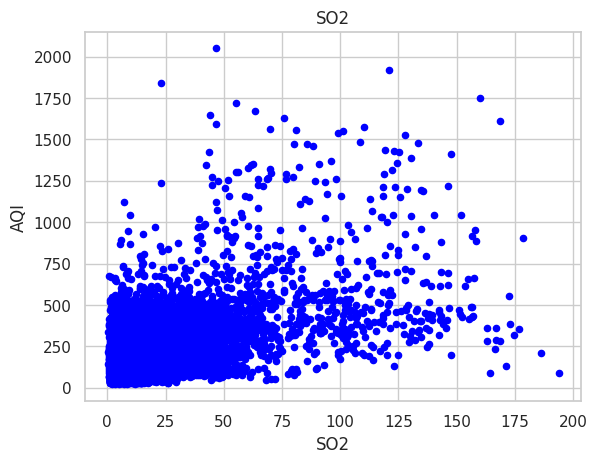

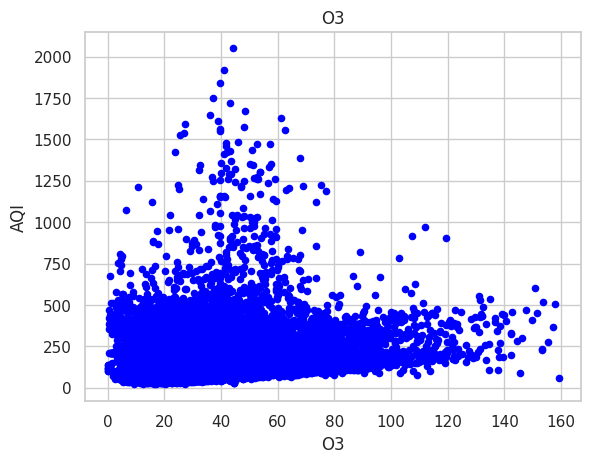

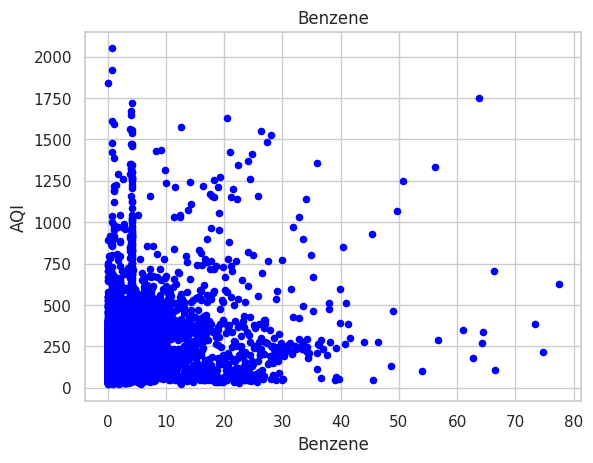

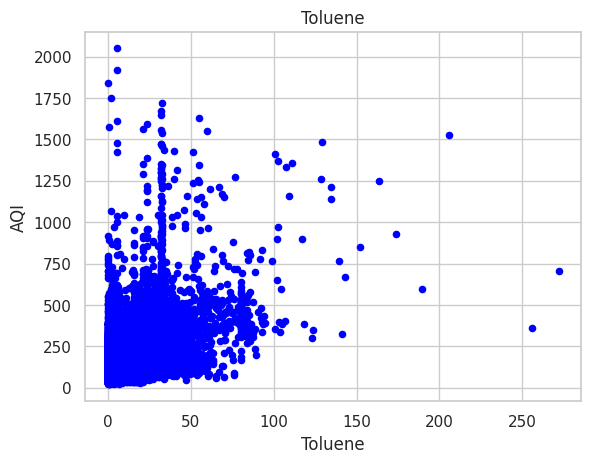

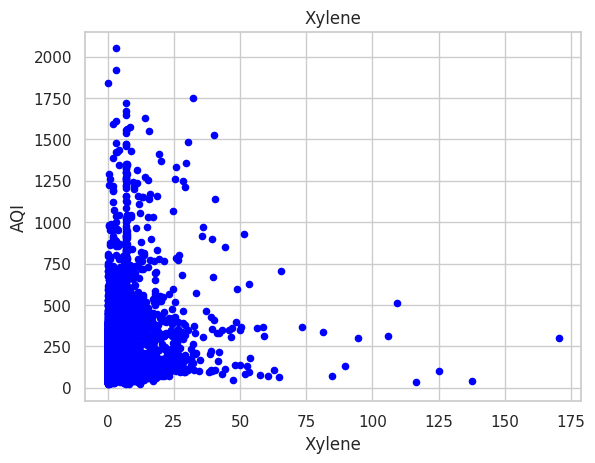

In [ ]:
# study the relationship between features and AQI
%matplotlib inline
cols = df_master.columns
for label in cols[2:-2]:
  plt.scatter(df_master[label], df_master['AQI'], color='blue', s=20)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("AQI")
  plt.show()

## Random forest regressor

In [ ]:
cols = df_master.columns
x = df_master[cols[:-2]]
y = df_master["AQI"]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16457 entries, 0 to 29530
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    16457 non-null  float64
 1   PM10     16457 non-null  float64
 2   NO       16457 non-null  float64
 3   NO2      16457 non-null  float64
 4   NOx      16457 non-null  float64
 5   NH3      16457 non-null  float64
 6   CO       16457 non-null  float64
 7   SO2      16457 non-null  float64
 8   O3       16457 non-null  float64
 9   Benzene  16457 non-null  float64
 10  Toluene  16457 non-null  float64
 11  Xylene   16457 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
rfr_model = RandomForestRegressor(n_estimators=200, random_state=42)
rfr_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
y_pred = rfr_model.predict(x_test)

In [ ]:
# Calcualte the mean square error
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

44.39467630960783

In [ ]:
r2_score = rfr_model.score(x_test, y_test)
print(r2_score)

0.9156193158556781


## Feature importancy

    Feature  Importance
6        CO    0.577949
0     PM2.5    0.294953
1      PM10    0.033953
2        NO    0.017454
8        O3    0.015972
7       SO2    0.011826
3       NO2    0.010809
4       NOx    0.010551
11   Xylene    0.009361
10  Toluene    0.007945
9   Benzene    0.006193
5       NH3    0.003033


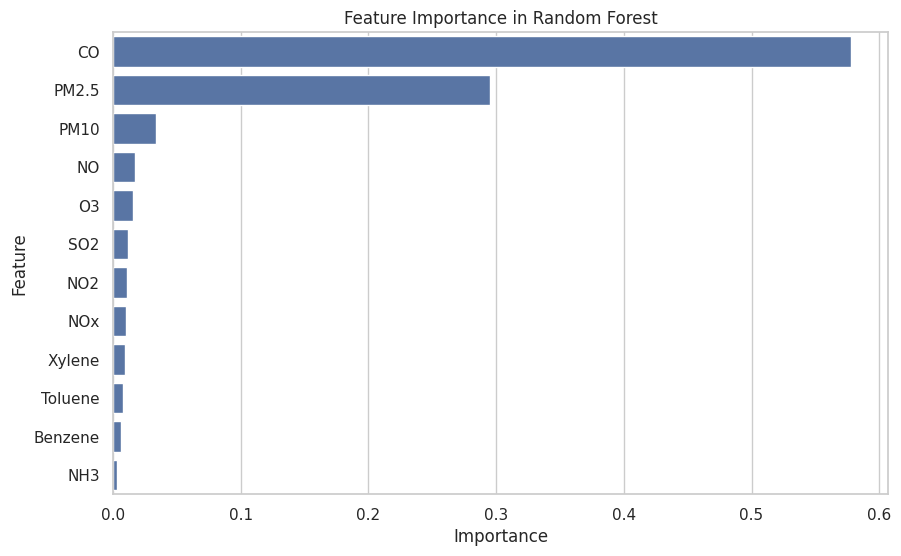

In [ ]:
# features_importances holds a list of numerical values, which is the importancy for the each features
importances = rfr_model.feature_importances_
# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': df_master.columns[:-2], 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importances)

# To visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Random Forest')
plt.show()

## Machine learning model evaluation(Random Forest Regressor)

According to the random forest regressor model, it give us a correlation of determination of 0.91, which is quite high. Thus, we are using this model to predict our AQI value.


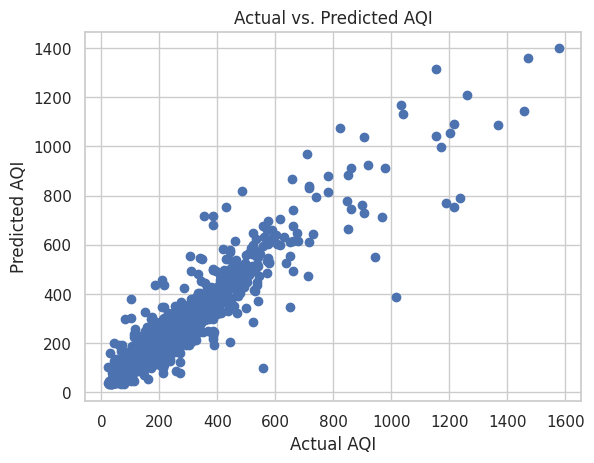

In [ ]:
y_pred = rfr_model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs. Predicted AQI')
plt.show()

# Train and evaluate the machine learning models (AQI_Bucket)

# Train, valid, test

In [ ]:
train, valid, test = np.split(df_master.sample(frac=1).reset_index(drop=True), [int(.6*len(df_master)), int(.8*len(df_master))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


## Data Transformation


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  # standardise
  x = scaler.fit_transform(x)
  data = np.hstack((x, np.reshape(y, (-1, 1))))

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  return data, x, y

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

## K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# evaluate the knn_model
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.90      0.88      0.89      1138
           1       0.81      0.78      0.80      1008
           2       0.70      0.81      0.75       470
           3       0.81      0.78      0.79       448
           4       0.85      0.86      0.85       228

    accuracy                           0.82      3292
   macro avg       0.81      0.82      0.82      3292
weighted avg       0.83      0.82      0.83      3292



## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model = svc_model.fit(x_train, y_train)

In [ ]:
y_pred = svc_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.97      0.88      0.92      1138
           1       0.87      0.92      0.89      1008
           2       0.87      0.96      0.91       470
           3       0.91      0.92      0.91       448
           4       0.92      0.89      0.90       228

    accuracy                           0.91      3292
   macro avg       0.91      0.91      0.91      3292
weighted avg       0.91      0.91      0.91      3292



## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.99      0.88      0.93      1138
           1       0.87      0.96      0.92      1008
           2       0.91      0.99      0.95       470
           3       0.93      0.96      0.94       448
           4       1.00      0.88      0.93       228

    accuracy                           0.93      3292
   macro avg       0.94      0.93      0.93      3292
weighted avg       0.94      0.93      0.93      3292



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model = rf_model.fit(x_train, y_train)

In [ ]:
y_pred = rf_model.predict(x_test)
y_test

array([-1,  1,  1, ...,  3,  2,  1], dtype=int8)

In [ ]:
y_pred

array([-1,  1,  1, ...,  3,  2,  1], dtype=int8)

In [ ]:
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.91      0.95      1138
           1       0.90      1.00      0.95      1008
           2       0.95      1.00      0.97       470
           3       0.93      0.94      0.93       448
           4       1.00      0.86      0.92       228

    accuracy                           0.95      3292
   macro avg       0.96      0.94      0.95      3292
weighted avg       0.95      0.95      0.95      3292



## The features importancy

    Feature  Importance
12      AQI    0.548010
0     PM2.5    0.119848
1      PM10    0.091448
6        CO    0.071403
5       NH3    0.041033
7       SO2    0.025003
10  Toluene    0.021933
2        NO    0.020048
3       NO2    0.019088
4       NOx    0.013976
8        O3    0.010695
9   Benzene    0.009455
11   Xylene    0.008061


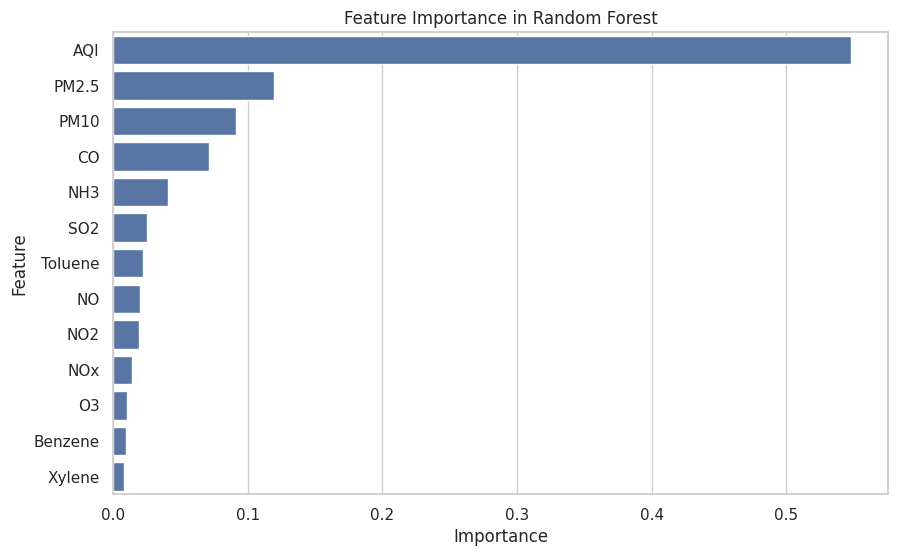

In [ ]:
# features_importances holds a list of numerical values, which is the importancy for the each features
importances = rf_model.feature_importances_
# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': df_master.columns[:-1], 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importances)

# To visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Random Forest')
plt.show()

## Machine Learning Model Evaluation (Random Forest Classifier)

As you can see from the machine learning model classification report above, you can see that the k-nearest neighbor model give us the accuracy of 84 percent, the support vector machine give us the accuracy of 92 percent, the random forest classifier model give us the accuracy of 98 percents and the logistic regression give us the accurarcy of 95 percent. Thus, we will use the random forest classifier model as our machine learning model.